In [1]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/22101326_Md Rakibul Hasan_Lab2/Image'

Mounted at /content/drive


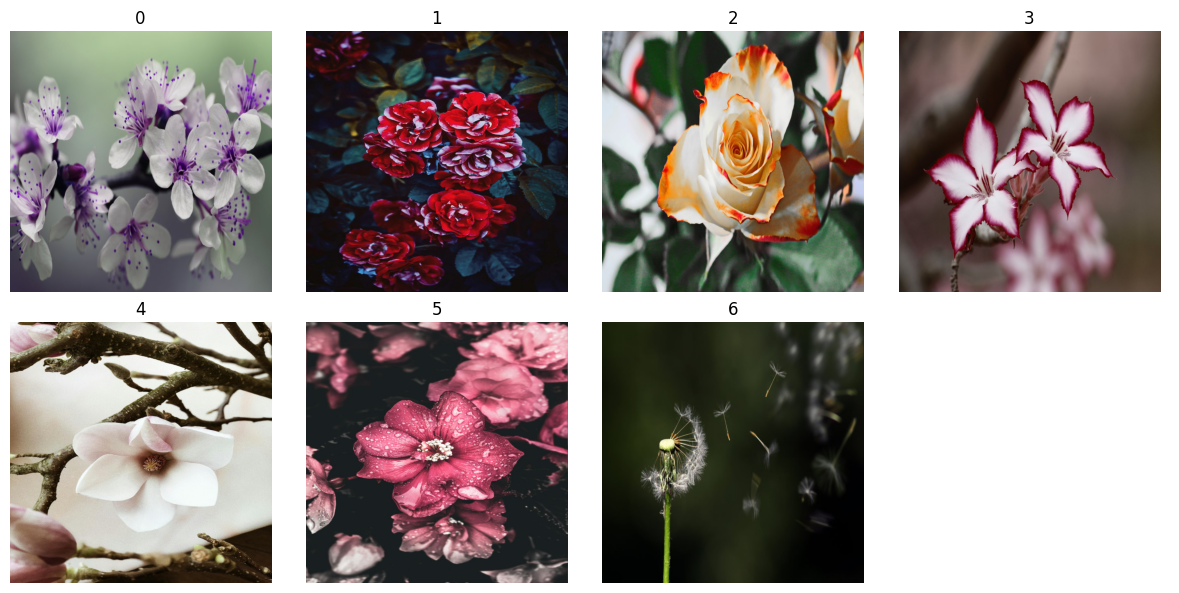

In [4]:
img_list = []
for image in os.listdir(folder_path):
    image_path = os.path.join(folder_path, image)
    img = cv2.imread(image_path,cv2.IMREAD_COLOR_RGB)
    if img is not None:
        img_list.append(cv2.resize(img,(800,800)))

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
  if i < len(img_list):
    ax.set_title(i)
    ax.imshow(img_list[i])

  ax.axis('off')
plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()


##Step 1: Exploring Basic Convolution and Custom Kernels

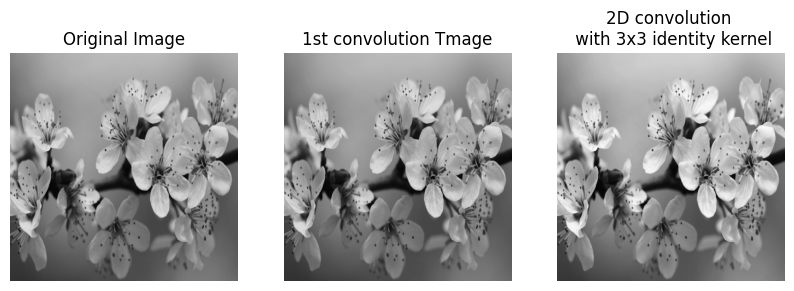

In [5]:
#implement a simple 3x3 identity kernel.
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

# image_path = os.path.join(folder_path,os.listdir(folder_path)[0])
# img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

img = cv2.cvtColor(img_list[0], cv2.COLOR_BGR2GRAY)

img_filtered = cv2.filter2D(img, -1, kernel)###
twoD_convolution = cv2.filter2D(img_filtered, -1, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1,3,3)
plt.title('2D convolution \n with 3x3 identity kernel')
plt.imshow(twoD_convolution, cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('1st convolution Tmage')
plt.imshow(cv2.cvtColor(img_filtered, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

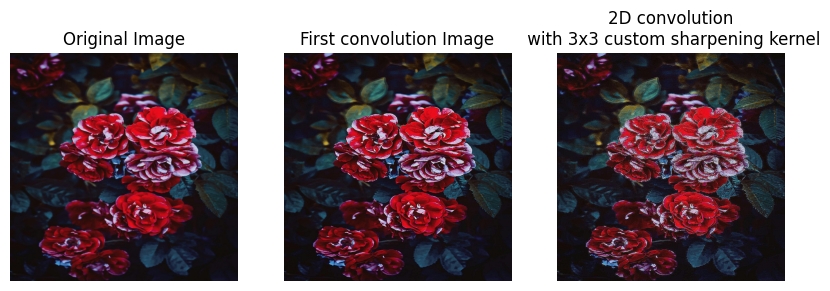

In [6]:
#custom 3x3 sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# image_path = os.path.join(folder_path, os.listdir(folder_path)[1])
# img = cv2.imread(image_path)

img = cv2.cvtColor(img_list[1], cv2.COLOR_BGR2RGB)

img_filtered = cv2.filter2D(img, -1, kernel)###
img_filtered_2D = cv2.filter2D(img_filtered, -1, kernel)###

plt.figure(figsize=(10, 5))
plt.subplot(1,3,3)
plt.title('2D convolution\n with 3x3 custom sharpening kernel')
plt.imshow(cv2.cvtColor(img_filtered_2D, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,2)
plt.title('First convolution Image')
plt.imshow(cv2.cvtColor(img_filtered, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

## Step 2: Understanding Padding and Its Effects on Convolution

In [9]:
# Diff type of padding
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

img = cv2.cvtColor(img_list[2],cv2.COLOR_BGR2GRAY)

#Zero padding(constant)
img = cv2.filter2D(img, -1, kernel)
padded_constant = np.pad(img, pad_width=200, mode='constant', constant_values=0)

#Reflect padding
padded_reflect = np.pad(img, pad_width=200, mode='reflect')

#Same padding
kernel_size = 3

# Calculate padding needed for "same" padding with a 3x3 kernel
pad_height = (kernel_size - 1) // 2
pad_width = (kernel_size - 1) // 2

output_same = np.pad(img, pad_width=((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

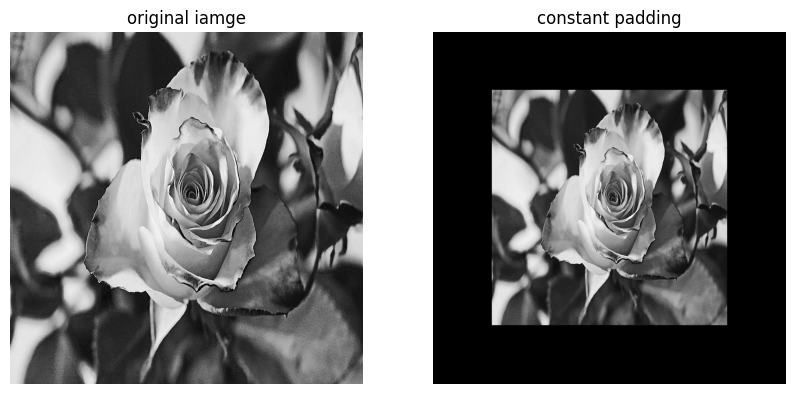

In [11]:
#Constant padding
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img,cmap = 'gray')
plt.title('original iamge')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(padded_constant,cmap = 'gray')
plt.title('constant padding')
plt.axis('off')
plt.show()

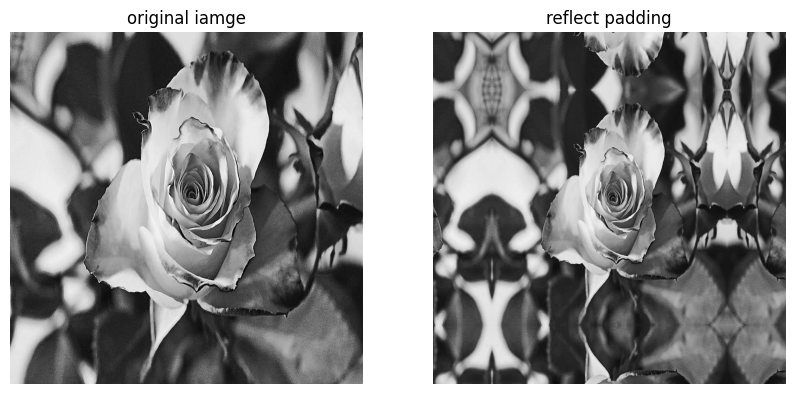

In [12]:
#Reflect padding
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img,cmap = 'gray')
plt.title('original iamge')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(padded_reflect,cmap = 'gray')
plt.title('reflect padding')
plt.axis('off')
plt.show()

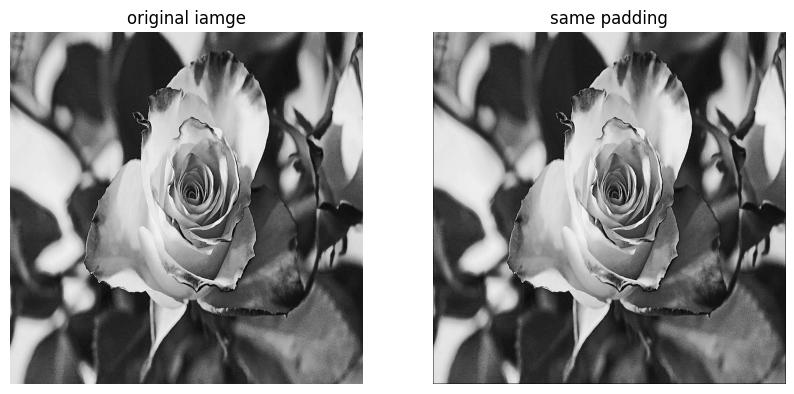

In [13]:
#Same padding
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img,cmap = 'gray')
plt.title('original iamge')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(output_same,cmap = 'gray')
plt.title('same padding')
plt.axis('off')
plt.show()

##Step 3: Filtering for Noise Reduction and Smoothing

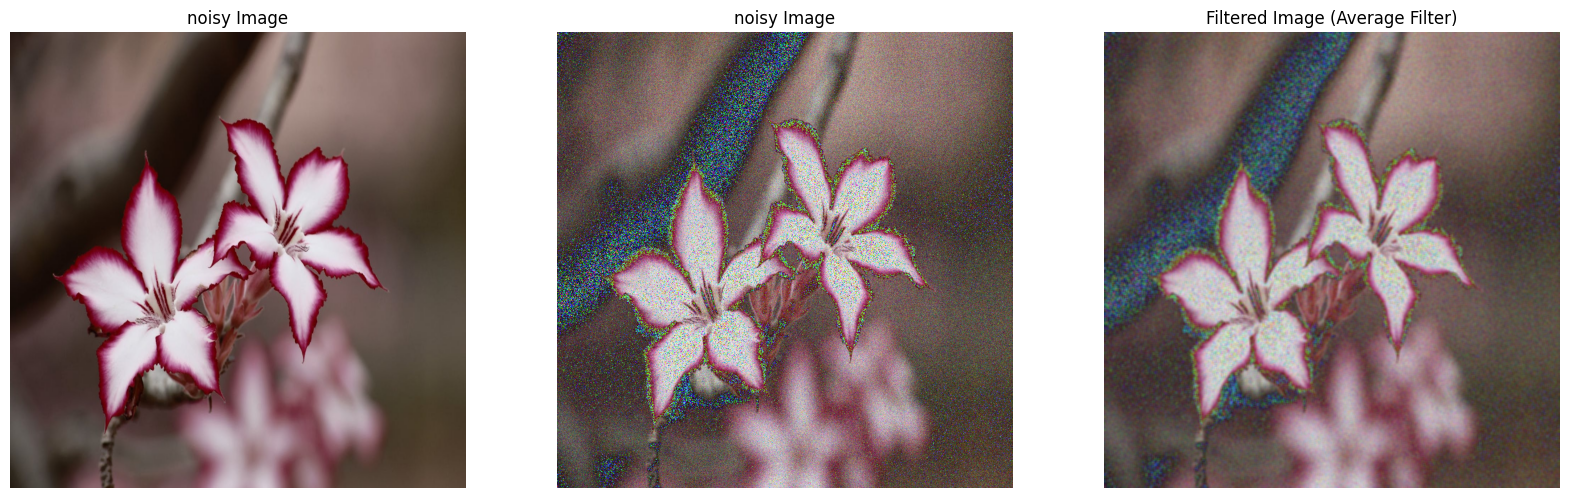

In [14]:
#Adding Gaussian Noise and Applying an Average Filter
img = img_list[3]
mean = 0
sigma = 25
noisy_image = img + np.random.normal(mean, sigma, img.shape).astype(np.uint8)

filtered_image = cv2.blur(noisy_image, (5, 5)) #Avg filter

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('noisy Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image)
plt.title('noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image)
plt.title('Filtered Image (Average Filter)')
plt.axis('off')
plt.show()

* Gaussian noise adds random variations in pixel intensity, creating a grainy noise effect. Applying a 5×5 average filter with cv2.blur() smooths the image by averaging neighboring pixels, reducing noise but also slightly blurring fine details.

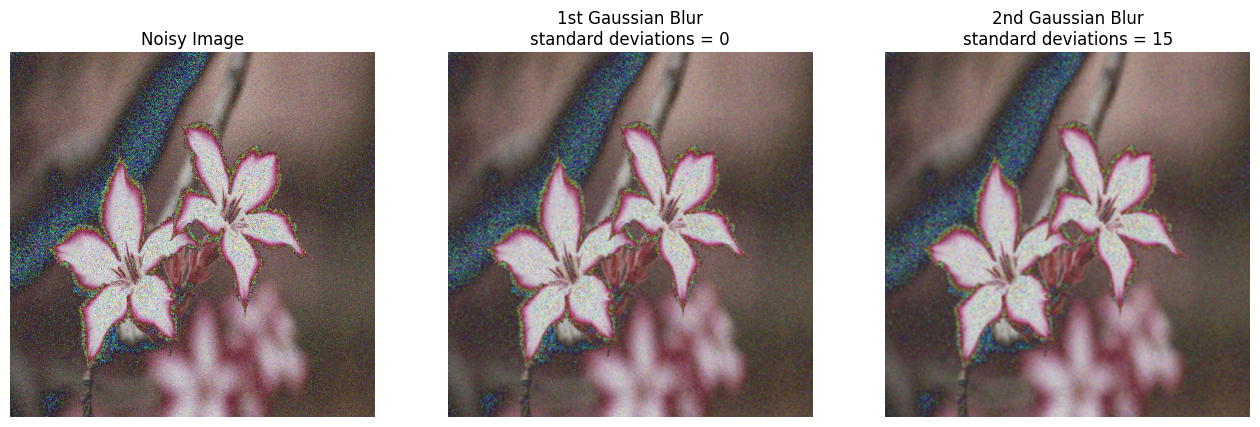

In [15]:
# Gaussian Blur for Smoothing
filtered_image_1 = cv2.GaussianBlur(noisy_image, (5, 5), sigmaX=0)
filtered_image_2 = cv2.GaussianBlur(noisy_image, (5, 5), sigmaX=15)
plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtered_image_1)
plt.title('1st Gaussian Blur\nstandard deviations = 0')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image_2)
plt.title('2nd Gaussian Blur\nstandard deviations = 15')
plt.axis('off')

plt.show()

* Applied a 5x5 gaussian blur to the noisy image previously created. Gaussian blur smooths noisy image by using the gaussian distribution law. If the standard deviation is increased the blurring smooths out the noise more than lower value of standard deviation.

##Step 4: Edge Detection and Gradient Calculation

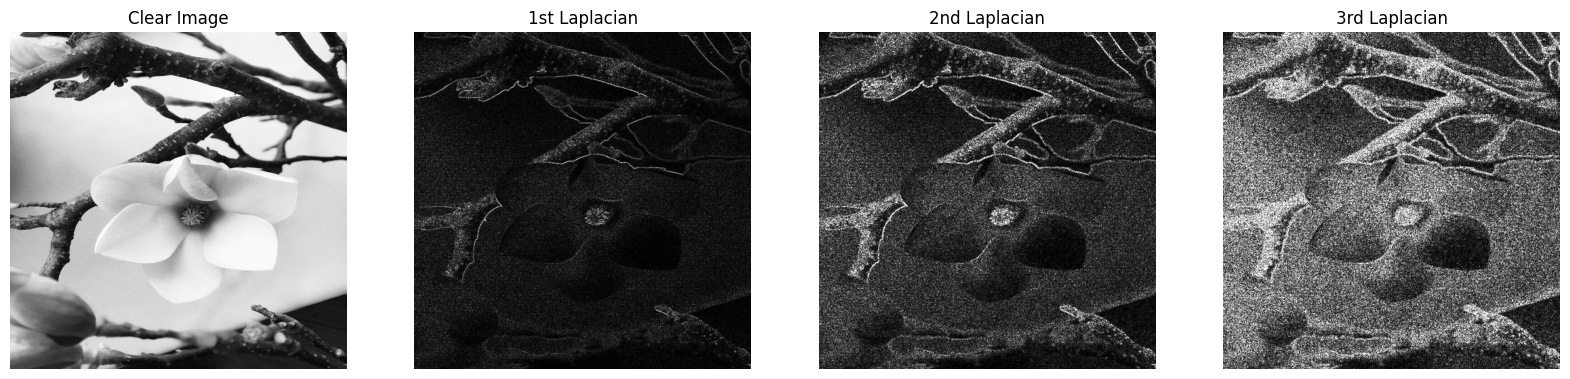

In [17]:
#Applying Laplacian Filter for Edge Detection
clear_image = cv2.cvtColor(img_list[4], cv2.COLOR_RGB2GRAY) # Load as grayscale for edge detection

# Apply Laplacian filter
#1st time
laplacian_filtered_image = cv2.Laplacian(clear_image, cv2.CV_64F)  # Use 64F to handle negative values
laplacian_filtered_image = cv2.convertScaleAbs(laplacian_filtered_image) # Convert back to 8-bit

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(clear_image, cmap='gray')
plt.title('Clear Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(laplacian_filtered_image, cmap='gray')
plt.title('1st Laplacian')
plt.axis('off')

#2nd time
laplacian_filtered_image = cv2.Laplacian(laplacian_filtered_image, cv2.CV_64F)  # Use 64F to handle negative values
laplacian_filtered_image = cv2.convertScaleAbs(laplacian_filtered_image)
plt.subplot(1, 4, 3)
plt.imshow(laplacian_filtered_image, cmap='gray')
plt.title('2nd Laplacian')
plt.axis('off')

#3rd time
laplacian_filtered_image = cv2.Laplacian(laplacian_filtered_image, cv2.CV_64F)  # Use 64F to handle negative values
laplacian_filtered_image = cv2.convertScaleAbs(laplacian_filtered_image)
plt.subplot(1, 4, 4)
plt.imshow(laplacian_filtered_image, cmap='gray')
plt.title('3rd Laplacian')
plt.axis('off')

plt.show()

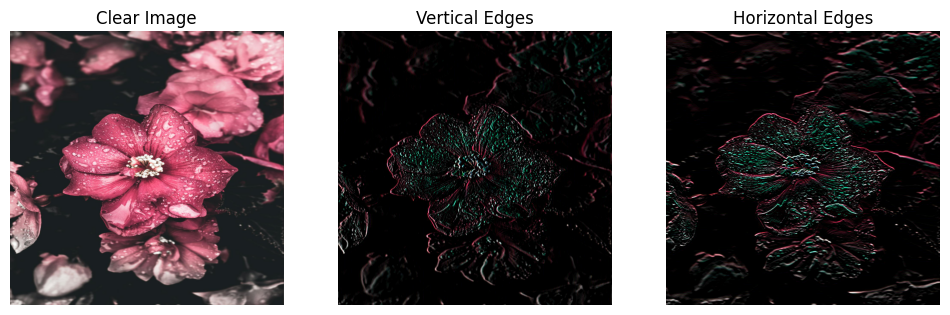

In [19]:
#Estimating Horizontal and Vertical Gradients
img = img_list[5]

kernel = np.array([[-1,0,1],
          [-1,0,1],
          [-1,0,1]])
v_edges = cv2.filter2D(img, -1, kernel)

kernel = np.array([[-1,-1,-1],
          [0,0,0],
          [1,1,1]])

h_edges = cv2.filter2D(img, -1, kernel)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Clear Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(v_edges)
plt.title('Vertical Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(h_edges)
plt.title('Horizontal Edges')
plt.axis('off')

plt.show()

By using the vertical gradient kernel highlights edges where intensity changes along the y-axis, detecting vertical structures, while the horizontal gradient kernel captures edges along the x-axis, detecting horizontal features.

##Step 5: Image Enhancement through Histogram Equalization

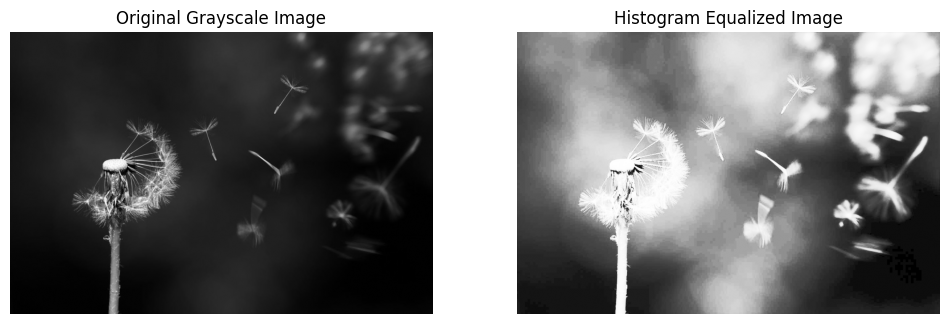

In [42]:
# Histogram Equalization for Contrast Enhancement
#Task1
img = os.listdir(folder_path)[6]
img = cv2.imread(os.path.join(folder_path,img),cv2.IMREAD_GRAYSCALE)

equalized_image = cv2.equalizeHist(img)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.show()

* Histrogram equalization is used to enhance contrast by using the most frequent intensity value of pixel by redistribute among all the pixels. this method makes the low contrast image clearer, more detailed.

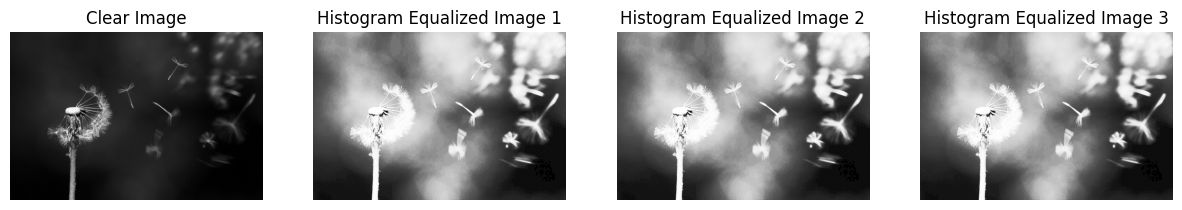

In [41]:
#Task2
# Apply Histogram Equalization three times
first_equalization = cv2.equalizeHist(img)
second_equalization = cv2.equalizeHist(first_equalization)
third_equalization = cv2.equalizeHist(second_equalization)

# Plotting the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title(f'Clear Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(first_equalization, cmap='gray')
plt.title('Histogram Equalized Image 1')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(second_equalization, cmap='gray')
plt.title('Histogram Equalized Image 2')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(third_equalization, cmap='gray')
plt.title('Histogram Equalized Image 3')
plt.axis('off')

plt.show()

* Histogram equalization repeatedly applied to the original image leads to diminishing returns, since the original contrast enhancement has a limit after the first application. Repeated equalization can add artifacts such as over-enhanced edges, or unrealistic distributions of intensity, with little or no benefit in terms of visibility.